In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from dateutil import parser
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import IPython
import IPython.display
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
import keras.activations as ka
import gc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error


/Users/jabedhossain/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
model_lstm = load_model('lstm_model_df1.h5')
model_hybrid = load_model('hybrid_model_df1.h5')
model_gru = load_model('gru_model_df1.h5')

In [3]:
df_train=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_train_minmax_df1.csv")
df_train

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-06-19 00:01:02,0.508197,1.000000,0.160656,0.922358,0.129904,8.137705e-13,0.0
1,2021-06-19 00:01:22,0.491803,1.000000,0.384741,0.913047,0.128160,8.137705e-13,0.0
2,2021-06-19 00:01:44,0.508197,1.000000,0.122764,0.919259,0.129032,8.137705e-13,0.0
3,2021-06-19 00:02:07,0.508197,1.000000,0.935694,0.900623,0.128160,8.137705e-13,0.0
4,2021-06-19 00:02:27,0.508197,1.000000,0.093913,0.909941,0.129032,8.137705e-13,0.0
...,...,...,...,...,...,...,...,...
69796,2021-08-10 04:02:46,0.196721,0.929293,0.174472,0.034165,0.727114,1.098970e-12,0.0
69797,2021-08-10 04:03:05,0.196721,0.939394,0.049393,0.034165,0.733217,1.140609e-12,0.0
69798,2021-08-10 04:03:25,0.196721,0.939394,0.179029,0.027954,0.733217,1.124848e-12,0.0
69799,2021-08-10 04:04:04,0.213115,0.939394,0.190994,0.034165,0.743679,7.781265e-13,0.0


In [4]:
df_test=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_test_minmax_df1.csv")
df_test

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-08-10 04:04:44,0.213115,0.939394,0.187534,0.027954,0.743679,8.349883e-13,0.0
1,2021-08-10 04:05:03,0.196721,0.939394,0.106389,0.027954,0.741935,9.811007e-13,0.0
2,2021-08-10 04:05:23,0.213115,0.929293,0.173815,0.027954,0.746295,1.053560e-12,0.0
3,2021-08-10 04:05:42,0.196721,0.939394,0.153370,0.040377,0.743679,8.061827e-13,0.0
4,2021-08-10 04:06:22,0.196721,0.939394,0.168819,0.037271,0.742807,8.308197e-13,0.0
...,...,...,...,...,...,...,...,...
29911,2021-10-13 02:48:31,0.934426,1.000000,0.010551,-3.096264,0.785527,1.358754e-11,0.0
29912,2021-10-13 03:17:36,0.934426,1.000000,0.024660,-3.018629,0.819529,9.609368e-12,0.0
29913,2021-10-13 03:46:49,0.918033,1.000000,0.020566,-3.173906,0.800349,1.891754e-11,0.0
29914,2021-10-13 04:13:23,0.885246,1.000000,0.117988,-3.195648,0.783784,2.462101e-11,0.0


In [11]:
# Select the features based on the analysis
selected_features = [
    'Temperature', 
    'Turbidity', 
    'Dissolved_Oxygen', 
    'pH', 
    'Nitrate' 
]

X_train = df_train[selected_features]
X_test = df_test[selected_features]
# Convert DataFrame to NumPy array
X_train_np = X_train.values
X_test_np = X_test.values

# Verify the conversion
print(f"Shape of the data after converting to numpy array: {X_train_np.shape}")
print(f"Shape of the data after converting to numpy array: {X_test_np.shape}")

Shape of the data after converting to numpy array: (69801, 5)
Shape of the data after converting to numpy array: (29916, 5)


In [12]:
time_steps = 10

# Reshape data to 3D array [number of sequences, time steps, features]
X_train_lstm = np.array([X_train_np[i:i+time_steps] for i in range(len(X_train_np) - time_steps + 1)])
X_test_lstm = np.array([X_test_np[i:i+time_steps] for i in range(len(X_test_np) - time_steps + 1)])

# Verify the shape
print(f"Shape of the dataset after reshaping: {X_train_lstm.shape}")
print(f"Shape of the dataset after reshaping: {X_test_lstm.shape}")

Shape of the dataset after reshaping: (69792, 10, 5)
Shape of the dataset after reshaping: (29907, 10, 5)


In [14]:
# Function to convert mixed types to floats
def convert_to_float(value):
    if isinstance(value, bool):
        return float(value)
    elif isinstance(value, (int, float)):
        return float(value)
    else:
        return value

# Apply the conversion function
X_train_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_train_lstm], dtype=np.float32)
X_test_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_test_lstm], dtype=np.float32)

# Verify the conversion
print(f"Data types in the dataset after conversion: {X_train_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_train_lstm[:1]}")

print(f"Data types in the dataset after conversion: {X_test_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_test_lstm[:1]}")

Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.5081967  1.         0.16065598 0.92235804 0.12990409]
  [0.4918033  1.         0.38474098 0.9130471  0.12816042]
  [0.5081967  1.         0.12276427 0.91925895 0.12903225]
  [0.5081967  1.         0.93569374 0.90062326 0.12816042]
  [0.5081967  1.         0.09391296 0.9099411  0.12903225]
  [0.4918033  1.         0.0687899  0.92235804 0.12990409]
  [0.5081967  1.         0.12193577 0.916153   0.12903225]
  [0.5081967  1.         0.07086115 0.916153   0.12816042]
  [0.4918033  1.         0.4141771  0.91925895 0.12816042]
  [0.4918033  1.         0.16950144 0.9534176  0.12728858]]]
Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.21311475 0.93939394 0.18753351 0.02795356 0.74367917]
  [0.19672132 0.93939394 0.1063892  0.02795356 0.7419355 ]
  [0.21311475 0.9292929  0.17381452 0.02795356 0.7462947 ]
  [0.19672132 0.93939394 0.1533

In [15]:
# Verify that all elements are now of type float32
assert X_train_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

assert X_test_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

All data is now of type float32.
All data is now of type float32.


## Compariosn

In [16]:
# Recreate the validation set by splitting the training data
split_index = int(0.9 * X_train_lstm.shape[0])
X_val_lstm = X_train_lstm[split_index:]
X_train_lstm_actual = X_train_lstm[:split_index]

In [17]:
# Recalculate validation and test predictions for each model
X_val_pred_lstm = model_lstm.predict(X_val_lstm)
X_test_pred_lstm = model_lstm.predict(X_test_lstm)

X_val_pred_hybrid = model_hybrid.predict(X_val_lstm)
X_test_pred_hybrid = model_hybrid.predict(X_test_lstm)

X_val_pred_gru = model_gru.predict(X_val_lstm)
X_test_pred_gru = model_gru.predict(X_test_lstm)

# Calculate MSE for each model on validation and test data
val_mse_lstm = mean_squared_error(X_val_lstm.reshape(-1, X_val_lstm.shape[2]), X_val_pred_lstm.reshape(-1, X_val_pred_lstm.shape[2]))
test_mse_lstm = mean_squared_error(X_test_lstm.reshape(-1, X_test_lstm.shape[2]), X_test_pred_lstm.reshape(-1, X_test_pred_lstm.shape[2]))

val_mse_hybrid = mean_squared_error(X_val_lstm.reshape(-1, X_val_lstm.shape[2]), X_val_pred_hybrid.reshape(-1, X_val_pred_hybrid.shape[2]))
test_mse_hybrid = mean_squared_error(X_test_lstm.reshape(-1, X_test_lstm.shape[2]), X_test_pred_hybrid.reshape(-1, X_test_pred_hybrid.shape[2]))

val_mse_gru = mean_squared_error(X_val_lstm.reshape(-1, X_val_lstm.shape[2]), X_val_pred_gru.reshape(-1, X_val_pred_gru.shape[2]))
test_mse_gru = mean_squared_error(X_test_lstm.reshape(-1, X_test_lstm.shape[2]), X_test_pred_gru.reshape(-1, X_test_pred_gru.shape[2]))

# Store the results in a dictionary
model_results = {
    'LSTM': {
        'Validation MSE': val_mse_lstm,
        'Test MSE': test_mse_lstm
    },
    'Hybrid LSTM': {
        'Validation MSE': val_mse_hybrid,
        'Test MSE': test_mse_hybrid
    },
    'GRU': {
        'Validation MSE': val_mse_gru,
        'Test MSE': test_mse_gru
    }
}

# Print the results
for model_name, results in model_results.items():
    print(f"{model_name} Validation MSE: {results['Validation MSE']:.6f}")
    print(f"{model_name} Test MSE: {results['Test MSE']:.6f}")
    print("-" * 40)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
935/935 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
935/935 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
935/935 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step
LSTM Validation MSE: 0.070672
LSTM Test MSE: 0.117291
----------------------------------------
Hybrid LSTM Validation MSE: 0.031364
Hybrid LSTM Test MSE: 0.078357
----------------------------------------
GRU Validation MSE: 0.043784
GRU Test MSE: 0.079851
----------------------------------------


### Plot

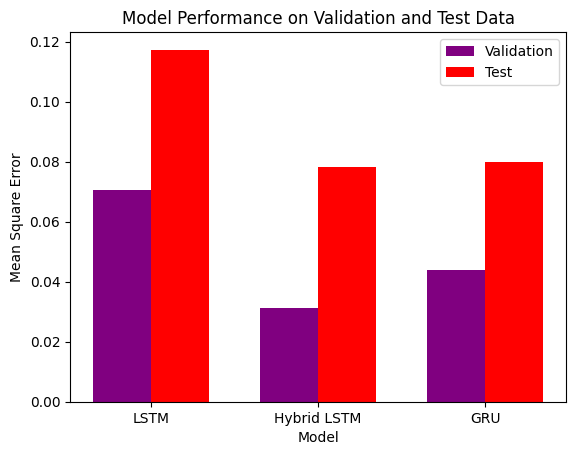

In [18]:
# Extract model names, validation MSE, and test MSE for plotting
model_names = list(model_results.keys())
validation_mse = [model_results[name]['Validation MSE'] for name in model_names]
test_mse = [model_results[name]['Test MSE'] for name in model_names]

# Plotting the bar chart
fig, ax = plt.subplots()

index = np.arange(len(model_names))
bar_width = 0.35

bars1 = ax.bar(index, validation_mse, bar_width, label='Validation', color='purple')
bars2 = ax.bar(index + bar_width, test_mse, bar_width, label='Test', color='red')

ax.set_xlabel('Model')
ax.set_ylabel('Mean Square Error')
ax.set_title('Model Performance on Validation and Test Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()